# Exam 1
## Applied Machine Learning (BUAN 6341)


Deliverables:

- Write down your answers to MCQ in the answer sheet.
- Write down your codes, printed results, and corresponding discussions in the cells below the problems.
    - You will find several cells under each problem. You can use one, some, or all cells based on your preference.
    - If you need more cells to check temporary results, add a cell using the "+" button or shortcut "esc + b". You do NOT need to remove these cells upon submission.
- Include TWO files (.ipynb, and .docx) in a zipped folder and submit to eLearning.

In [91]:
NAME = "Prachi Dalal"

In [92]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Section 2.1. Regression Models

In this section, we are going to use the same bike-sharing dataset in Assignment 1. Below is a brief description of the dataset (also same as Assignment 1).

##### The Dataset

We will be using the daily version of the Capital Bikeshare System dataset from the UCI Machine Learning Repository. This data set contains information about the daily count of bike rental checkouts in Washington, D.C.’s bikeshare program between 2011 and 2012. It also includes information about the weather and seasonal/temporal features for that day (like whether it was a weekday).
- **day:** Day of the record (relative to day 1:2011-01-01)
- **season:** Season (1:spring, 2:summer, 3:fall, 4:winter)
- **weekday:** Day of the week (0=Sunday, 6=Saturday)
- **workingday:** If day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit:**<br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
- **temp:** Normalized temperature in Celcius
- **windspeed:** Normalized wind speed
- **casual:** Count of checkouts by casual/non-registered users
- **registered:** Count of checkouts by registered users
- **cnt:** Total checkouts

#### Data Prep

Run the cells below to load the split the data. We will use features ('weekday', 'season','workingday', 'temp', 'windspeed', 'weathersit') to predict the checkout counts. We are interested in predicting the total checkout counts (i.e., 'cnt').


In [93]:
import pandas as pd
day = pd.read_csv("day.csv")
print(day.columns.values) # to find variable names
day.head()

['day' 'season' 'weekday' 'workingday' 'weathersit' 'temp' 'windspeed'
 'casual' 'registered' 'cnt']


,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600


In [94]:
var = ['weekday', 'season','workingday', 'temp', 'windspeed', 'weathersit']
X = day[var]
y = day['cnt']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Problem 1: Linear Regression (10 pts)**

Train a Linear regression model using the training set. 

- We would like to use MSE as the performance measure. What is the MSE for the training and the test set?  Which value should be reported to evaluate the model's performance? Explain briefly.
- Report ONLY the coefficients for variable "temp" and "weathersit". Match the coefficient with the variable properly. How would you interpret the coefficients for the two variables? *(Note: You need only discuss the positive/negative relationship between the X and Y. You do not need to interpret the explicit magnitude.)*
    - Do you think the results make sense? Briefly explain.
    - Do you think we are coding the two variables (i.e., temp and weathersit) properly? Which one(s) do you think is improper? Do you have suggestions for improvement? (Discussion Only. Code not required).


In [95]:
#import 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [96]:
#train model
model.fit(X_train, y_train)

LinearRegression()

In [97]:
#(1) y_pred_train
y_pred_train = model.predict(X_train)

#(2) y_pred_test
y_pred_test = model.predict(X_test)

In [99]:
#performance evaluation 
#"What is the MSE for the training and the test set?"
#test
etest = y_test - y_pred_test # error
MSE_test = np.mean(etest**2)

#training 
etrain = y_train - y_pred_train 
MSE_train = np.mean(etrain**2)
print("MSE of training:", MSE_train)
print("MSE of test:", MSE_test)

#The MSE value for the test set should be reported because it is an unbiased measure since it was not used during parameter
#estimation / training 

MSE of training: 1852849.4373569074
MSE of test: 1816812.3742340647


In [100]:
#Report ONLY the coefficients for variable "temp" and "weathersit". Match the coefficient with the variable properly. 
np.set_printoptions(precision=4, suppress=True)
var = ['weekday', 'season','workingday', 'temp', 'windspeed', 'weathersit']
print("coefficients:")
print("temperature:", model.coef_[3])
print("weathersit", model.coef_[5])

#How would you interpret the coefficients for the two variables? (Note: You need only discuss the positive/negative 
#relationship between the X and Y. You do not need to interpret the explicit magnitude.)
#the temperature variable has a positive relationship with the dependent variable y. As temperature increases, the number of bike rentals increases. 
#the weathersit variable has a negative relationship with the dependent variable y. As weathersit increases, the number of bike rentals descreases. 

#Do you think the results make sense? Briefly explain.
#Yes these results make sense because in general, people want to bike when the temperature is hotter. It also makes sense that as weathersit increases, bike rentals descrease because the highest category of weathersit is bad weather. 

#Do you think we are coding the two variables (i.e., temp and weathersit) properly? Which one(s) do you think is 
#improper? Do you have suggestions for improvement? 
#it is a possibility that we are not coding weathersit properly. Since it is a categorical variable (1,2,3), 
#we may need to normalize the data to ensure all the variables are on the same scale. 
#We can use min/max scalar to ensure all the variables are on the same scale and the model is measuring them equally. 


coefficients:
temperature: 5245.485671894189
weathersit -800.6094377679341


**Problem 2: LASSO Regression (12 pts)**

Train a LASSO regression model with grid search and 5-fold cross validation. The potential choices of lambda (i.e., hyperparameters) are: 0.001, 0.01, 0.1, 1, 10, 100.  

- What is the hyperparameter chosen? 
- Report the coefficient and intercept of the best model chosen. 
- Based on the current coefficient estimates, without training additional models, answer questions below.
    - Are there any variables that are not helpful in predicting the total checkout count? If yes, what are they? Explain briefly.
    - If we set lambda to 0.0001, are we able to exclude any variables? If we set lambda to 1000, are we able to exclude any variables? Explain briefly.
- We would like to use R-squared as the performance measure. What is the R-squared value for the test set?  What is the mean validation R-squared value of the best model? 
- The two measures (i.e., mean validation R-squared value and test R-squared value) are used for different purposes. Briefly explain what the two measures are used for correspondingly.

In [32]:
#import
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [33]:
# define grid of parameters
lasso_params = { 'alpha' :  [0.001, 0.01, 0.1, 1, 10, 100] }

In [34]:
#define gridsearch estimation function 
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, cv = 5)

In [35]:
#train data 
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [36]:
#"What is the hyperparameter chosen?" - alpha = 1
#best hyperparameter
print(lasso_grid.best_params_)

{'alpha': 1}


In [37]:
#Report the coefficient and intercept of the best model chosen.
print("coefficient of best model:", lasso_grid.best_estimator_.coef_)
print("intercept of best model", lasso_grid.best_estimator_.intercept_)

coefficient of best model: [   76.5378   415.7713   128.731   5222.2339 -1824.4194  -799.342 ]
intercept of best model 2066.023470990603


In [ ]:
#Are there any variables that are not helpful in predicting the total checkout count? 
#If yes, what are they? Explain briefly.
var = ['weekday', 'season','workingday', 'temp', 'windspeed', 'weathersit']
#LASSO punishes variables by making their coefficients 0. Since none of these coefficients are close to 0, 
#we can say they are all helpful in predicting the total checkout count

In [103]:
#If we set lambda to 0.0001, are we able to exclude any variables?
#If we set lambda to 1000, are we able to exclude any variables? Explain briefly.
from sklearn.linear_model import Lasso

lasso_base1 = Lasso(alpha = 0.001)
lasso_base1.fit(X_train, y_train)
y_pred_test = lasso_base1.predict(X_test)
print("alpha = 0.001:", lasso_base1.coef_, lasso_base1.intercept_) 

lasso_base2 = Lasso(alpha = 1000)
lasso_base2.fit(X_train, y_train)
y_pred_test = lasso_base2.predict(X_test)
print("alpha = 1000:", lasso_base2.coef_, lasso_base2.intercept_) 

#Yes. In the first model with alpha = 0.001, none of the coefficients are close to 0 so we cannot exclude any of them
#In the second model, however, we can exclude all of the variables. In LASSO regression, as alpha reaches infinity, the coefficients get set to 0 since it is a more conservative model 


alpha = 0.001: [   76.774    412.6659   132.2063  5245.4624 -1995.5644  -800.6082] 2093.381363143727
alpha = 1000: [ 0.  0.  0.  0. -0. -0.] 4574.998175182482


In [104]:
#We would like to use R-squared as the performance measure. 
#What is the R-squared value for the test set? 
print(lasso_grid.score(X_test, y_test))

#What is the mean validation R-squared value of the best model?
np.max(lasso_grid.cv_results_['mean_test_score'])

0.5273339521987706


0.4761310883810908

In [105]:
#The two measures (i.e., mean validation R-squared value and test R-squared value) are used for different purposes. Briefly explain what the
#two measures are used for correspondingly.
#the test R^2 value is the unbiased performance measure for the test set.
#On the other hand, the mean validation R-sqaured value for the best model is the performance measure based on which "best" hyperparamer is chosen (R2)

**Problem 3: Ridge Regression Extended (12 pts)**

Train a Ridge regression model, ridge50, using the training set with lambda = 50. Then Train another Ridge regression model, ridge5, using the training set with lambda = 5.

- Report the coefficients and the intercept of the two Ridge regressions. 
- Compare the coefficients and intercept of the two Ridge regression. What pattern do you expect when comparing the coefficients and intercept of the two models?
    - Is the comparison of the two intercepts and all coefficients consistent with your expectation? 
    - Do you have any guesses on why the pattern is/is not consistent with your expectation?
- Now, obtain the sum of the squared value of the coefficients for (1) the ridge50 model, and (2) the ridge5 model. Then add the squared value of the intercept of the corresponding models. Here, you have obtained two summed values.
    - Report and compare the two values, what do you find? 
    - Based on the practice so far, as well as the penalty term applied to the objective function, can you briefly explain what coefficient pattern is explicitly expected when comparing a Ridge regression with different lambdas?


In [106]:
from sklearn.linear_model import Ridge
ridge50 = Ridge(alpha = 50)
ridge50.fit(X_train, y_train)
y_pred_test = ridge50.predict(X_test)

print("coefficients (50):", ridge50.coef_)
print("intercept:",  ridge50.intercept_)

coefficients: [  77.6418  616.0391  163.959  1317.6573 -178.9279 -750.325 ]
intercept: 3115.1364365160916


In [109]:
ridge5 = Ridge(alpha = 5)
ridge5.fit(X_train, y_train)
y_pred_test = ridge5.predict(X_test)

print("coefficients (5):", ridge5.coef_)
print("intercept:",  ridge5.intercept_)

coefficients (5): [  77.3541  495.8282  161.8522 4022.3383 -863.8155 -837.4364]
intercept: 2314.03990678701


In [110]:
#Compare the coefficients and intercept of the two Ridge regression. 
#What pattern do you expect when comparing the coefficients and intercept of the two models?
# I expect to see lower coefficients for a higher alpha because since the model is being more conservative, the coefficients that aren't as relevant get smaller and have a lower impact. 

#Is the comparison of the two intercepts and all coefficients consistent 
#with your expectation?
#yes, although majority of the coefficients (when alpha is 5) are lower than the coefficients when alpha is 50, the last two coefficients decreased significantly, having an overall effect on the model. 
#this shows that increases alpha increases how strict the model is, and will lower the coefficient's impact as a result. 

#Do you have any guesses on why the pattern is/is 
#not consistent with your expectation?
#When the coefficients of the variables decrease, it causes them to have less of an impact on the dependent variable. Alpha acts as the shinkage penalty so the higher the alpha, the higher the penalty the coefficients get. 

In [ ]:
#Now, obtain the sum of the squared value of the coefficients for (1) the ridge50 model, and (2) the ridge5 model. Then add the squared value of the intercept of the corresponding models. 
#Here, you have obtained two summed values.


#Report and compare the two values, what do you find?
#Based on the practice so far, as well as the penalty term applied to the objective function, can you briefly explain what coefficient pattern is explicitly expected when comparing a Ridge regression with different lambdas?





### Section 2.2 Classification

In this section, we would like to study the taste preference of red wine. You need to train different classification models and answer corresponding questions.

#### Data and Setting

We consider *vinho verde*, a unique product from the Minho (northwest) region of Portugal. Testers are invited to taste the wine and rate the wine quality. The detailed information of wine can be found in “wine.csv”. Variables are listed below. (You can skip the variable description as they are mostly area-specific terminologies).


- Fixed acidity (g(tartaric acid)/dm3)
- Volatile acidity (g(acetic acid)/dm3)
- Citric acid (g/dm3)
- Residual sugar (g/dm3)
- Chlorides (g(sodium chloride)/dm3)
- Free sulfur dioxide (mg/dm3)
- Total sulfur dioxide (mg/dm3)
- Density (g/cm3)
- pH
- Sulphates (g(potassium sulphate)/dm3)
- Alcohol (vol.%)
- Quality: wine quality rated by tester

#### Data Preparation
We use all other variables to predict the wine quality (Quality). Use the code below to load and split the data.

In [117]:
import pandas as pd
wine = pd.read_csv("wine.csv")
print(wine.columns.values) # to find variable names
wine.head()

['fixedacidity' 'volatileacidity' 'citricacid' 'residualsugar' 'chlorides'
 'freesulfurdioxide' 'totalsulfurdioxide' 'density' 'ph' 'sulphates'
 'alcohol' 'quality']


,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [112]:
var = ['fixedacidity','volatileacidity','citricacid','residualsugar','chlorides','freesulfurdioxide',\
     'totalsulfurdioxide','density', 'ph','sulphates', 'alcohol']
X = wine[var]
y = wine['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=999)

Run the cell below to obtain summary statistics of the data.

In [113]:
wine.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538805,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


**Problem 1: K-NN (12 pts)**

Train a K-Nearest Neighbor (k-NN) model with grid search and 10-fold cross-validation. Let the distance measure be Euclidean distance. Let the potential choices of be all odd numbers between 3 and 21 (inclusive). Training the model may take a couple of seconds.

- What is the chosen k? What is the mean validation accuracy when the best k is chosen? 
- Suppose we have another wine, and we observe its features: **“7; 0.27; 0.36; 20.7; 0.045; 45; 170; 1.001; 3; 0.45; 8.8”**  (Input values are in the same order of the X variables, i.e., 'fixedacidity' = 7, volatileacidity = 0.27, etc.). 
    - Predict its quality using the selected k-NN model.
    - Report ONLY the distances of the k Nearest Neighbors.
    - Given the new sample, how many of its k Nearest Neighbors have the label of y = 1? 

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function
knn = KNeighborsClassifier()

# define a list of parameters: odd numbers 3-25 inclusive
param_knn = {'n_neighbors': range(3, 21, 2)}  # exactly the same as the input variable name. 
# range(i, j, s): integers from i to j, exclude j, increase by s

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 10)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 21, 2)})

In [115]:
# the best hyperparameter chosen:
print("chosen K: ", grid_knn.best_params_)

print("mean validation accuracy: ", grid_knn.best_score_)

{'n_neighbors': 13}
0.671421568627451


In [144]:
X_new = [[7, 0.27, 0.36, 20.7, 0.045, 45, 170, 1.001, 3, 0.45, 8.8]]
value = grid_knn.predict(X_new)
#Predict its quality using the selected k-NN model
#the quality would be array([0]) 

In [124]:
#Report ONLY the distances of the k Nearest Neighbors.
print("distances", grid_knn.best_estimator_.kneighbors(X_new))

#Given the new sample, how many of its k Nearest Neighbors have the label of y = 1?


distances (array([[26.4273, 28.3978, 29.7637, 31.0445, 31.7933, 32.8302, 34.205 ,
        36.5136, 36.9853, 37.0005, 38.1209, 38.7989, 39.4244]]), array([[ 165,  545,  643,  343,  920,  778, 1013,  518,  682,  494,   24,
        1123,   11]]))


**Problem 2: Logistic regression with regularization (8 pts)**

Train a logistic regression model with l2 regularization. 
- Report the coefficient values for fixedacidity and citricacid. (Hint: check code for data preparation step to find the order of variables.)
- Obtain and report the True Positive Rate (TPR) and False Positive Rate (FPR) of the test set. 
- Suppose that we manually set the probability to 0.8. How would you expect the TPR change? How would you expect FPR change? Explain briefly.

In [71]:
from sklearn.linear_model import LogisticRegression
#By default, l2 regularization is applied

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [142]:
print(logreg.coef_)

[[ 0.0016 -2.8923 -1.0658  0.0825 -0.9158  0.0255 -0.0204 -0.8692 -1.7845
   2.0023  0.8651]]


In [143]:
#Report the coefficient values for fixedacidity and citricacid
var = ['fixedacidity','volatileacidity','citricacid','residualsugar','chlorides','freesulfurdioxide',\
     'totalsulfurdioxide','density', 'ph','sulphates', 'alcohol']
print("fixedacidity:", logreg.coef_[0])
print("citricacid:", logreg.coef_[2])

fixedacidity: [ 0.0016 -2.8923 -1.0658  0.0825 -0.9158  0.0255 -0.0204 -0.8692 -1.7845
  2.0023  0.8651]


IndexError: index 2 is out of bounds for axis 0 with size 1

In [129]:
#Obtain and report the True Positive Rate (TPR) and False Positive Rate (FPR) of the test set.
y_pred_test = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, y_pred_test)

In [133]:
TP = my_matrix[1,1]
TN = my_matrix[0,0]
FP = my_matrix[0,1]
FN = my_matrix[1,0]

print("TPR: ", TP / (TP + FN))
print("FPR: ", FP / (TN + FP))

#from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#print('Recall score:', recall_score(y_test, y_pred_test))

TPR:  0.7465437788018433
FPR:  0.32786885245901637


In [ ]:
#Suppose that we manually set the probability to 0.8. How would you expect the TPR change? How would you expect FPR change? Explain briefly.
#if we manually set the proability to 0.8, that means all observations with a probability less than 0.8 will be classed as 0. The model will
#be more conservativte, meaning it will classify more observations to 0. This will cause the TPR to decrease since there will be a lower ability
# to correctly identify all positive instances out of actual positive instances. This will also cause FPR to decrease because out of all the actual
#negatives, the model will correctly predict more as negative. 

**Problem 3: Performance Measure (14 pts)**

Now, let’s use roc curves to visualize the performance of the previous models, and compare with a naive model.

- We define the naive model be: predicting all records as y_pred = 1, regardless of their predictors. What would be its accuracy for the test set? 
- Generate roc curve of the logistic regression model using test set.  
- In the same figure, generate roc curve of the optimal kNN model using the test set. 
    - *Hint 1: By including the visualization syntax in two consecutive lines, you will obtain overlaied figure).* 
    - *Hint 2: In KNN, you will use the same syntax as in logistic regression to obtain the predicted probability, i.e., pi-hat*
- In the same figure, generate roc curve of the naive model. Label axis accordingly. 
    - *Hint: you should be able to complete this task using syntax learned in class. You may want to check Lecture 1's Coding File*
- Based on the figure, which model has a better performance? Based on the comparison, are we able to conclude which model is better? Do you have any concerns when conducting this comparison?

In [89]:
#What would be its accuracy for the test set?
Acc_Zeros = np.sum(0 == y_test)/y_test.shape 
print(Acc_Zeros)

Acc_Ones = np.sum(1 == y_test)/y_test.shape 
print(Acc_Ones)


[0.4575]
[0.5425]


Text(0, 0.5, 'TPR')

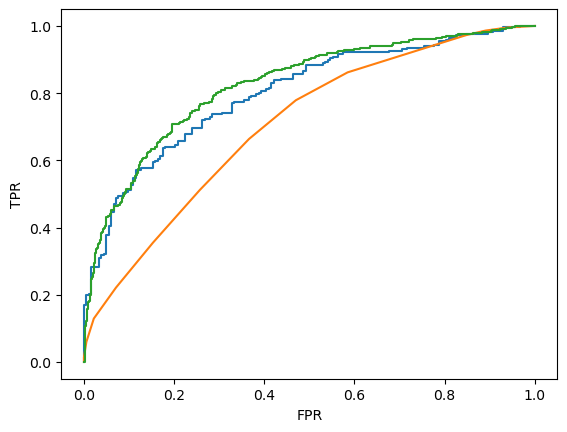

In [140]:
#Generate roc curve of the logistic regression model using test set.
from sklearn.metrics import roc_curve
pred_prob = logreg.predict_proba(X_test)[:,1] #prob_y=1
logreg.predict_proba(X_test)[ : , 1 ]
FPR, TPR, threshold = roc_curve(y_test, pred_prob)
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

#In the same figure, generate roc curve of the optimal kNN model using the test set
from sklearn.metrics import roc_curve
pred_prob = grid_knn.predict_proba(X_test)[:,1] #prob_y=1
grid_knn.predict_proba(X_test)[ : , 1 ]
FPR, TPR, threshold = roc_curve(y_test, pred_prob)
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

#In the same figure, generate roc curve of the naive model. Label axis accordingly
from sklearn.metrics import roc_curve
pred_prob = logreg.predict_proba(X_train)[:,1] #prob_y=1
logreg.predict_proba(X_train)[ : , 1 ]
FPR, TPR, threshold = roc_curve(y_train, pred_prob)
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [141]:
#Based on the figure, which model has a better performance? Based on the comparison, are we able to conclude which model is better? 
#Do you have any concerns when conducting this comparison?
#based on the figure, the ROC curve generated by the naive model has the best performance. This is because the naive model is based on the training data 
#which is not an unbiased performance measure. My concerns when making this comparison is that using the training data is biased because it is
#the same data that is used to estimate the parameters 

In [1]:
def great(a, b):
    while a != 0 and b != 0:
        if a > b:
            a = a - b
        else:
            b = b - a
    return max(a, b)

result = great(21, 35)
print(result)

7


In [2]:
j = 1
k = 2

for i in range(3):
    j += k
    k += j

print(k)


34


In [6]:
strings = ["a", "bc", "def", "ghij"]
output = ""
for x in strings:
    if len(x) % 2 == 0: 
        continue
    output += x
    print(output)

a
adef


In [ ]:
output